## **Assignment #1: Single variable linear regresion**

Write a single-variable linear regression code using the given code with following features.	

1) model: linear

2) cost function: MSE

3) optimizer: SGD

## 0. Import necessary modules


In [58]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.metrics import mean_absolute_error
import argparse
import time

## 1. Data preparation

Preparing data for linear regression. Data made of combining $sin(x)$ and $cos(x)$ with some random error. The dataset has one input feature for one $y$ value which requires **single variable linear regression**.

---
The function generates total 2400 data and it is split into three parts; training, validation and testing. Each dataset has 1600, 400 and 400 respectively.

**Data Set**  
$$X_{train} \in \mathcal{R}^{360 \times 1}, Y_{train} \in \mathcal{R}^{360}$$  
$$X_{test} \in \mathcal{R}^{40 \times 1}, Y_{test} \in \mathcal{R}^{40}$$

### Inspecting dataset

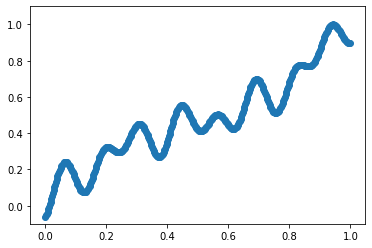

In [59]:
# ====== Data generation using Numpy ====== #
# Generate random data with a kind of linear trend
num_data = 400
X = np.arange(num_data)/num_data
np.random.seed(3)
Y = X+0.1*np.sin(6*X)-0.1*np.sin(3*X)+0.1*np.random.rand()*np.sin(30*X)-0.1*np.random.rand()*np.cos(50*X) +0.05*np.random.rand()*np.cos(3*X)
Y = Y /np.amax(Y)
plt.ylim(-.1,1.1)
plt.scatter(X,Y)

### **Split data**

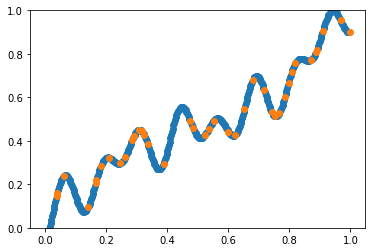

In [60]:
# Take 10% of data randomly as the test dataset
ntest = int(0.1*len(X))
idx = np.random.choice(X.shape[0], ntest, replace=False)

X_train = np.delete(X, idx)
Y_train = np.delete(Y, idx)

X_ = []
Y_ = []
for i in idx:
    X_.append(X[i])
    Y_.append(Y[i])

X_test = np.array(X_)
Y_test = np.array(Y_)

plt.ylim(0, 1)
plt.scatter(X_train,Y_train)
plt.scatter(X_test,Y_test, marker='o')

In [61]:
print(type(X_train), X_train.shape)
print(type(Y_train), Y_train.shape)
print(X_train.reshape(X_train.shape[0],-1).shape)

<class 'numpy.ndarray'> (360,)
<class 'numpy.ndarray'> (360,)
(360, 1)


## 2. Model define  

Linear model is defined as $H(x) = Wx + b$ by calling `nn.Linear` module in PyTorch.

### **Linear Model**   
$$H = \ XW + b \ \ ( W \in \mathcal{R}^{1 \times 1}, b \in \mathcal{R}^{1}, H \in \mathcal{R}^{N \times 1})$$


In [62]:
# ====== Linear model ====== #
class LinearModel(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(LinearModel, self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.linear = nn.Linear(in_features=in_dim, out_features=out_dim, bias=True)

    def forward(self, x):
        return self.linear(x)

## 3. Simulation Define

`pytorch` has a function named `loss.backward()` to calculate parameter gradients and then `optimizer.step()` can update all parameters using those gradient.

For every a certain amount of iteration, Test Set is tested by comparing the predicted value with true value using Mean Absolute Error. 

$$MAE(Y_{true}, Y_{predict}) = \sum_{i} | \ y_{true}^{(i)} - y_{predict}^{(i)} \ | $$

In [63]:
def experiment(args):

    # ====== Call the model ====== #
    model = LinearModel(args.in_dim, args.out_dim)

    print(model)
    print(model.linear.weight)
    print(model.linear.bias)

    # ====== Loss function ====== #

    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=args.lr)


    # ====== Data collection ====== #
    list_epoch = []
    list_train_loss = []
    list_val_loss = []
    list_acc = []
    list_acc_epoch = []


    # ====== Loop ====== #
    for epoch in range(args.epoch):  
        
        # ====== Train ====== #

        model.train()

        optimizer.zero_grad() #Initializing gradients 

        input_x = torch.Tensor(X_train.reshape(X_train.shape[0],-1))
        true_y = torch.Tensor(Y_train)

        pred_y = model(input_x)

        loss = criterion(pred_y.squeeze(), true_y)
        loss.backward() #Calc gradients 
        optimizer.step() #Update gradients 


        list_epoch.append(epoch)
        list_train_loss.append(loss.item())

        # ====== Validation ====== #


        # ====== Testing every 100 iteration ====== #

        if epoch %100 ==0:

            # ====== Calculate Accuracy ====== #

            model.eval()

            with torch.no_grad():
                input_x = torch.Tensor(X_test.reshape(X_test.shape[0],-1))
                true_y = torch.Tensor(Y_test)

                pred_y = model(input_x).detach().numpy()

                acc = mean_absolute_error(true_y, pred_y)

                list_acc.append(acc)
                list_acc_epoch.append(epoch)


            # plt.plot(X_train, Y_train, 'bo', label='Train data', alpha=0.5)
            # plt.plot(X_test, Y_test, 'r^', label='True data', alpha=0.5)
            # plt.plot(X_test, pred_y, 'g--', label='Predictions', alpha=0.5)
            # plt.legend(loc='best')
            # plt.show()

            print('epoch {}, loss {}'.format(epoch, loss))

    return list_epoch, list_train_loss, list_val_loss, list_acc, list_acc_epoch

## 4. Train & Evaluation

In [66]:
ts = time.time()

seed = 123
np.random.seed(seed)
torch.manual_seed(seed)

# Set hyperparameters
parser = argparse.ArgumentParser()

args = parser.parse_args("")

args.in_dim = 1
args.out_dim = 1
args.lr = 0.005
args.epoch = 1000


list_epoch, list_train_loss, list_val_loss, list_acc, list_acc_epoch = experiment(args)


te = time.time()

print('\n Elapsed time: {} sec'.format(int(te-ts)))

LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Parameter containing:
tensor([[-0.4078]], requires_grad=True)
Parameter containing:
tensor([0.0331], requires_grad=True)
epoch 0, loss 0.5510428547859192
epoch 100, loss 0.10920098423957825
epoch 200, loss 0.06717648357152939
epoch 300, loss 0.05743686854839325
epoch 400, loss 0.05102783814072609
epoch 500, loss 0.045578617602586746
epoch 600, loss 0.04081673175096512
epoch 700, loss 0.03664508834481239
epoch 800, loss 0.03298969194293022
epoch 900, loss 0.02978661097586155

 Elapsed time: 0 sec


## 5. Report  


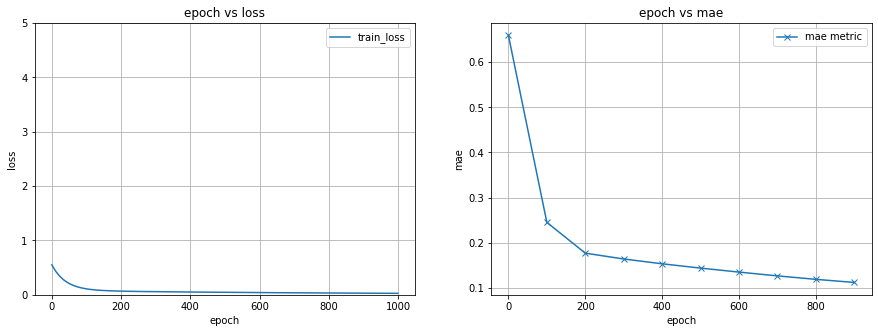

In [65]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
#ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='mae metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs mae')


plt.show()